2
98.0
98.0
98.0
[0.0, 941192.0, 0.0, 0.0, 0.0]
Done!
T


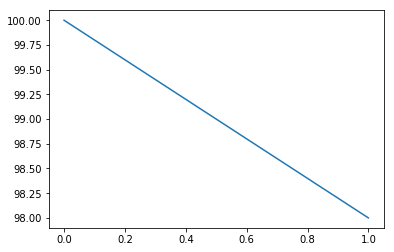

TX


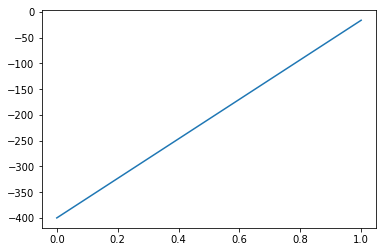

X


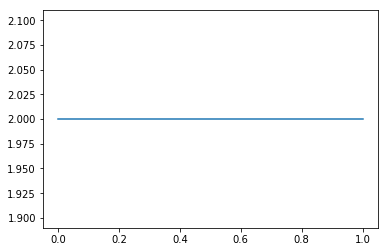

Mu0


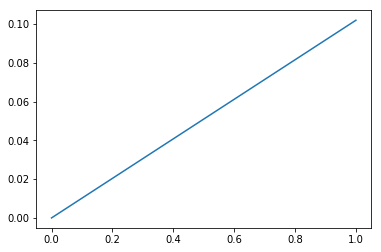

Mu1


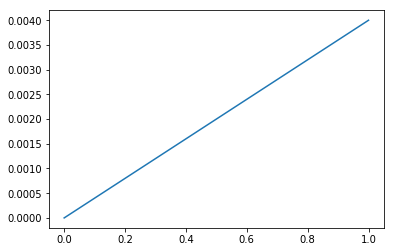

Mu2


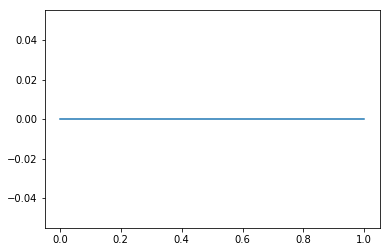

R0


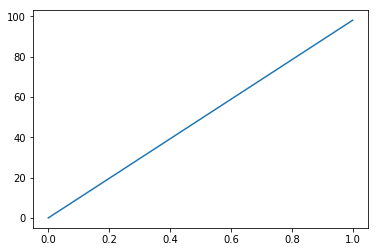

R1


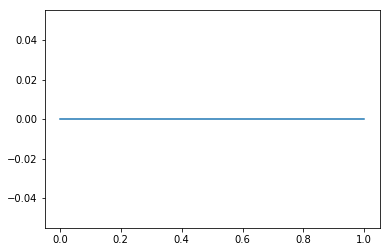

R0star


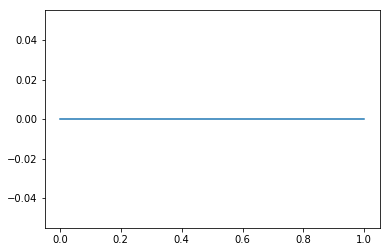

R1star


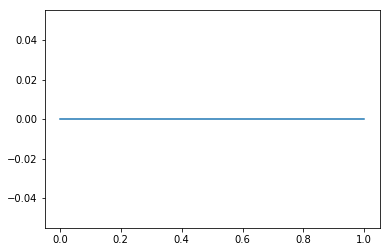

Ez0


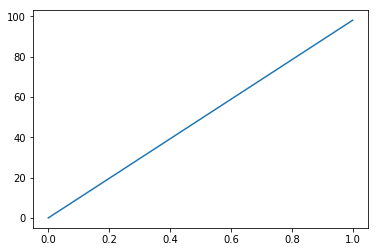

Ez1


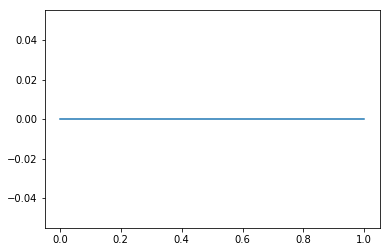

Ew0


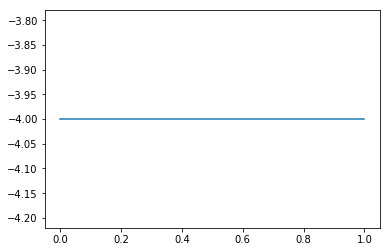

Ew1


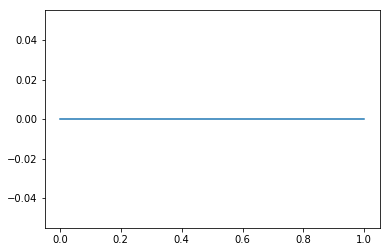

A


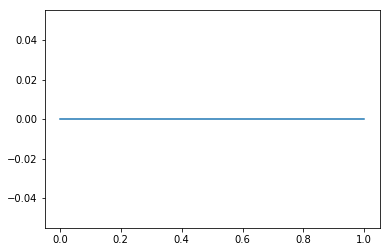

EA0


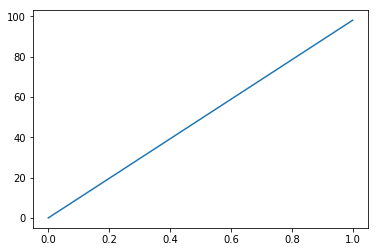

EA1


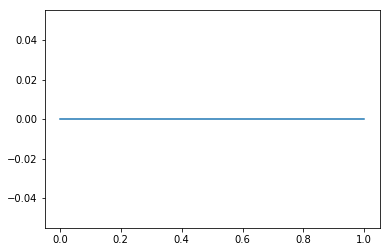

Wa11


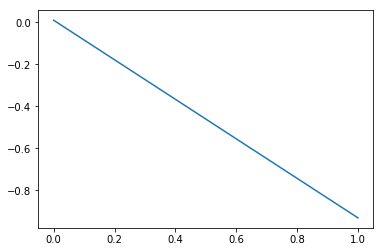

Wa12


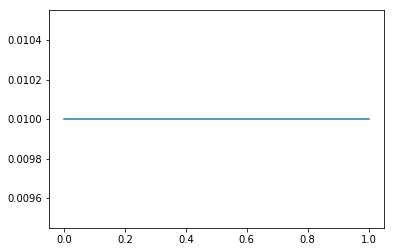

Wa21


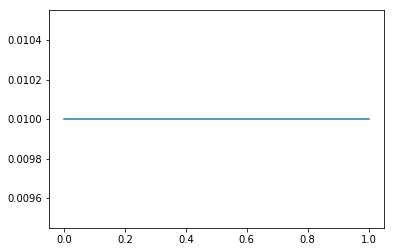

Wa22


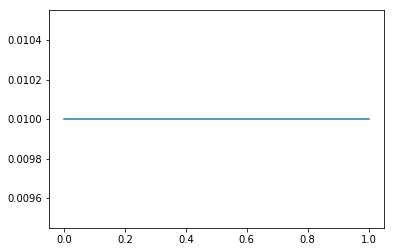

-16.0
99.0


In [63]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# simulatin parameters
simTime = 2
dt = 1
time = range(int(simTime/dt))
N = len(time)
print(N)
action =True
# generative model parameters
desired_temp = 4 #desired temperature
# time action onsets
actionTime = simTime/ 4
# initialize sensors
r0 = [0]
r1 = [0]
#sensort variances
varz0 = 1
varz1 = 1
#hidden state variances
varw0 = 1
varw1 = 1
vara0 = 1
vara1 = 1
# params for generative process
T0 = 100 # temperature at x = 0
#initialize brain states
mu0 = [0]
mu1 = [0]
mu2 = [0]
r0star = [0]
r1star = [0]
# sensory noise
zgp_0 = np.random.uniform(0,0.000000, N)
zgp_1 = np.random.uniform(0,0.000000,N)
# innitialize action variable
a = [0]
#initialize generative process
xdot = [a[0]]
x = [2] # start arbitrarily 
T = [T0/ (x[0]^2 + 1)]
Tx = [(-2 * T0 * x[0]) * ((x[0]^2 + 1)**-2)]
Tdot = [Tx[0] * xdot[0]]
# initialize error terms
ez0 = [r0[0] - mu0[0]]
ez1 = [r1[0] - mu1[0]]
ew0 = [r0[0] + mu0[0] - desired_temp]
ew1 = [mu2[0] + mu1[0]] 
ea0 = [r0[0] - r0star[0]]
ea1 = [r1[0] - r1star[0]]
eaa0 = [mu0[0] - r0star[0]]
eaa1 = [mu1[0] - r1star[0]]

wa11 = [0.01]
wa12 = [0.01]
wa21 = [0.01]
wa22 = [0.01]
#learning rates
k = 0.1 # for inference
ka = 0.01 # for learning/action!
kaw = 0.000001


def compute_vfe(ez0, ez1, ew0, ew1):
    return ((1/2*varz0) * np.square(ez0)) + ((1/2*varz1) * np.square(ez1)) + ((1/2*varw0) * np.square(ew0)) + ((1/2*varw1) * np.square(ew1)) + np.log(varz0 + varz1 + varw0 + varw1)       
# initialize the variational energy
vfe = [compute_vfe(ez0[0], ez1[0], ew0[0], ew1[0])]

for i in range(1, N):
    xdot.append(a[i-1]) # this is the action
    x.append(x[i-1] + xdot[i])
    #T.append(T0/((x[i]+1)))
    #T.append(np.sin(x[i]))
    T.append(T0 - x[i])
    Tx.append((-2 * T0 * x[i]) * (x[i]**2 + 1)**-2)
    #Tx.append(np.cos(x[i]))
    Tdot.append(Tx[i] * xdot[i])
    
    # calculate the sensory input!
    r0.append(T[i] + zgp_0[i])
    r1.append(Tdot[i] + zgp_1[i])
    
    ez0.append(r0[i] - mu0[i-1]) 
    ez1.append(r1[i]- mu1[i-1])
    ew0.append(mu1[i-1] + mu0[i-1] - desired_temp)
    ew1.append(mu2[i-1] + mu1[i-1])
    vfe.append(compute_vfe(ez0[i], ez1[i], ew0[i], ew1[i]))
    
    mu0.append(mu0[i-1] + k * (mu1[i-1] - (ka *((-1 * ez0[i]/varz0) + (ew0[i]/varw0)))))
    mu1.append(mu1[i-1] + k * (mu2[i-1] - (ka *((-1 * ez1[i]/varz1) + (ew0[i]/varw0) + (ew1[i]/varw1)))))
    mu2.append(mu2[i-1] - k* ka *(ew1[i]/varw1))
    
    r0star.append((wa11[i-1] * r0[i-1]) + (wa12[i-1] * a[i-1]))
    r1star.append((wa21[i-1] * r1[i-1]) + (wa22[i-1] * a[i-1]))
    ea0.append(r0[i] - r0star[i])
    ea1.append(r1[i] - r1star[i])
    eaa0.append(mu0[0] - r0star[i])
    eaa1.append(mu1[1] - r1star[i])

    if 1==1: 
        agrad = (((1/varz0)*ez0[i]) * ((1/vara0) *eaa0[i])*wa12[i-1]) + (((1/varz1)*eaa1[i]) * ((1/vara1)*ez1[i])*wa22[i-1])
        a.append(a[i-1] - ka*agrad) 
        
        wa11grad = ((1/varz0)*ez0[i]) *((1/vara0)*ea0[i])*r0[i]
        wa11.append(wa11[i-1] - (kaw * wa11grad))
        wa12grad = ((1/varz0)*ez0[i]) *((1/vara0)*ea0[i])*a[i]
        wa12.append(wa12[i-1] - (kaw * wa12grad))
        
        wa21grad = ((1/varz1)*ez1[i]) *((1/vara1)*ea1[i])*r1[i]
        wa21.append(wa21[i-1] - (kaw * wa21grad))
        wa22grad = ((1/varz1)*ez1[i]) *((1/vara1)*ea1[i])*a[i]
        wa22.append(wa22[i-1] - (kaw * wa22grad))
        print(ez0[i])
        print(ea0[i])
        print(r0[i])
        print([agrad, wa11grad, wa12grad, wa21grad, wa22grad])
      
    else:
        a.append(0)
        wa11.append(wa11[i-1])
        wa12.append(wa12[i-1])
        wa21.append(wa21[i-1])
        wa22.append(wa22[i-1])
       
    
print("Done!")

print("T")
plt.plot(time, T)
plt.show()
print("TX")
plt.plot(time, Tx)
plt.show()
print("X")
plt.plot(time, x)
plt.show()
print("Mu0")
plt.plot(time, mu0)
plt.show()
print("Mu1")
plt.plot(time, mu1)
plt.show()
print("Mu2")
plt.plot(time, mu2)
plt.show()
print("R0")
plt.plot(time, r0)
plt.show()
print("R1")
plt.plot(time, r1)
plt.show()
print("R0star")
plt.plot(time, r0star)
plt.show()
print("R1star")
plt.plot(time, r1star)
plt.show()
print("Ez0")
plt.plot(time, ez0)
plt.show()
print("Ez1")
plt.plot(time, ez1)
plt.show()
print("Ew0")
plt.plot(time, ew0)
plt.show()
print("Ew1")
plt.plot(time, ew1)
plt.show()
print("A")
plt.plot(time, a)
plt.show()

print("EA0")
plt.plot(time, ea0)
plt.show()

print("EA1")
plt.plot(time, ea1)
plt.show()

print("Wa11")
plt.plot(time, wa11)
plt.show()


print("Wa12")
plt.plot(time, wa12)
plt.show()

print("Wa21")
plt.plot(time, wa21)
plt.show()

print("Wa22")
plt.plot(time, wa22)
plt.show()



print(Tx[-1])
print(np.mean(T[simTime-10:simTime]))